# Proyek Analisis Data: E-Commerce Public Dataset



- **Nama:** Ni Made Ayu Pranasanthi Dewi
- **Email:** gekana744@gmail.com
- **ID Dicoding:** pranasanthi

## Menentukan Pertanyaan Bisnis

1. Apa saja produk terlaris yang dijual ?
2. Bagaimana tren pengembalian produk dalam dataset ini?
3. Bagaimana distribusi order status untuk setiap states pelanggan ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
customers_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
order_items = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/olist_order_items_dataset.csv')
order_items .head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
orders_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Insight : 
- Menggunakan 3 frame dataset yaitu customers_df, order_items, dan orders_df. Hal ini membantu memberikan wawasan tentang perilaku pelanggan serta kinerja produk yang tidak dapat diperoleh dari satu dataset saja.
- Dataset yang dikumpulkan memiliki format yang beragam, termasuk informasi teks (seperti nama pelanggan) dan waktu (seperti tanggal pemesanan). 

### Assessing Data
Melakukan penilaian data :

In [25]:
print('\n', customers_df.info())
print('\n', order_items.info())
print('\n', orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null

Mengecek data null :

In [26]:
print('\nnull in customers_df:\n', customers_df.isnull().sum())
print('\nnull in order_items:\n', order_items.isnull().sum())
print('\nnull in orders_df:\n', orders_df.isnull().sum())


null in customers_df:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

null in order_items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

null in orders_df:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Mengecek data duplikat :

In [27]:
print('\nduplicate in customers_df:\n', customers_df.duplicated().sum())
print('\nduplicate in order_items:\n', order_items.duplicated().sum())
print('\nduplicate in orders_df:\n', orders_df.duplicated().sum())


duplicate in customers_df:
 0

duplicate in order_items:
 0

duplicate in orders_df:
 0


Mengecek parameter statistik

In [28]:
print('\ndata describe customers_df:\n', customers_df.describe(include='all'))
print('\ndata describe order_items:\n', order_items.describe(include='all'))
print('\ndata describe orders_df:\n', orders_df.describe(include='all'))


data describe customers_df:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix 

Insight : 
- beberapa kolom dalam dataset memiliki nilai yang hilang sehingga perlu dibersihkan.
- diperlukan juga pengolahan data duplikat agar analisis tidak dipengaruhi oleh entri data yang tidak valid. 

### Cleaning Data

In [29]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [33]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  order_items[column] = pd.to_datetime(order_items[column])

In [38]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [36]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Insight : 
- Terdapat beberapa kolom yang memiliki nilai hilang, terutama pada kolom tanggal dan status pemesanan yang telah dibersihkan. 
- Menerapkan konversi kolom tanggal ke dalam format datetime untuk kolom shipping_limit_date, serta beberapa kolom lain di orders_df, untuk memastikan format yang konsisten agar analisis menjadi lebih efektif.

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [40]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
73664,d33885da5770ce864e8c39b0e8e5dcd6,f2acee9c80354f580f8e28fbd2f5abec,88015,florianopolis,SC
1169,4b635ddad21743917c499f9b05204909,c3166e62cdfb039707b78bcfc4828c86,36780,astolfo dutra,MG
12012,61796c6f77ebcb1897edf4a87ad5fa2a,9f634225ffdd9abe3cfe74e9008321a7,7033,guarulhos,SP
37621,8de55546e8d40ba8d5bda5aa4b70e955,3958d37762138869953bd7f6b5e7eaeb,35438,acaiaca,MG
87775,e9c7d222316ca2c78cbf05d83c1e9fa0,00d7e54ab8c5d9916f19209dbaacbb3d,6114,osasco,SP


In [41]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [46]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [47]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Insight : 
-  Pengelompokan berdasarkan customer_state dapat memberikan informasi jumlah pelanggan di setiap negara bagian. Hal ini dapat digunakan untuk merencanakan strategi distribusi dan pemasaran yang lebih tepat sasaran. 
- Dataset ini memberikan wawasan mengenai karakteristik demografis yang dapat mempengaruhi perilaku pembelian.
- Dataset ini memberikan wawasan untuk mengevaluasi keterlibatan pelanggan berdasarkan pola pembelian dan frekuensi transaksi.

### Explore order_items

In [48]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
37112,543dd9462e7d92ef58df34eea3ba7db5,1,7488482ecdc1096af0d1f23338dbdb4d,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-27 14:37:29,64.9,16.21
90956,ce9924e409dde4b753e2893f0835ba62,1,d5aab5918f6581c1857e6a0c38f13e78,01fd077212124329bac32490e8ef80d9,2018-05-21 04:30:55,69.0,12.92
19602,2d070e3a721ccc7ea881f090802680ea,1,0a70bfd7366ebae1c146277751691546,8b321bb669392f5163d04c59e235e066,2018-05-18 00:14:32,24.9,11.00
101160,e56df93227f8b483792fc4571550b4a8,1,b16cbe318e5c99bf0c0ffde3a92a5ff2,87142160b41353c4e5fca2360caf6f92,2017-03-07 15:42:05,39.9,16.05
9122,14dbe374dedd03ff06285484791c8d4e,1,703d742887bb9267f89b675608ba7aa0,640e21a7d01df7614a3b4923e990d40c,2018-08-02 22:04:23,56.1,13.97


In [73]:
product_sales = order_items['product_id'].value_counts().reset_index()
product_sales.columns = ['product_id', 'total_sales']
print (product_sales)

                             product_id  total_sales
0      aca2eb7d00ea1a7b8ebd4e68314663af          527
1      99a4788cb24856965c36a24e339b6058          488
2      422879e10f46682990de24d770e7f83d          484
3      389d119b48cf3043d311335e499d9c6b          392
4      368c6c730842d78016ad823897a372db          388
...                                 ...          ...
32946  dbc42f8ad8afd0147a5a46be630781f8            1
32947  5d86ed92606c80a89e547cdba3946812            1
32948  0b8750fa58fefe42cf03a9e2e4b8fce6            1
32949  a4758e74e2cdb74d0c4db83594ca14a3            1
32950  350688d9dc1e75ff97be326363655e01            1

[32951 rows x 2 columns]


Insight : 
- Analisis penjualan berdasarkan product_id menunjukkan produk terlaris dalam dataset, memberikan informasi penting untuk strategi pengadaan dan manajemen inventaris.
- Dataset ini mengungkapkan tren penjualan yang dapat membantu perusahaan dalam merencanakan promosi dan strategi pemasaran yang lebih efektif.
- Diversifikasi kategori produk dalam dataset memberikan wawasan tentang berbagai jenis produk yang diminati

### Explore orders_df

In [56]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
95498,bd486e41e0b895151c98b33db1504f8d,35e87ef5e133284e1e2ccbc8f8816d57,delivered,2018-08-17 23:59:46,2018-08-18 00:10:14,2018-08-22 08:52:00,2018-08-27 18:51:17,2018-08-31
26004,e353a2a4a96791860c46e1c91b426a4c,ccd400239a09450309dc8a43bf54d69d,delivered,2017-12-26 11:36:09,2017-12-27 04:07:47,2017-12-28 22:04:27,2018-01-04 16:15:11,2018-01-19
90568,4b9cf74b2132266bf6d3342a77342433,ff49e6d9cca102ee3a979a7712ca7859,delivered,2018-05-15 16:54:44,2018-05-15 17:55:28,2018-05-16 15:26:00,2018-05-18 18:22:35,2018-05-25
24817,d2621293a99afa3b92948bc9c9121c8e,897b0d2314e1886d01454dfe633dbd2a,delivered,2018-02-13 16:27:00,2018-02-15 03:47:35,2018-02-19 20:52:02,2018-03-05 17:41:59,2018-03-09
2195,96e5b56d000b07dd7bb1972eb42a0e79,4945390b4dfdbf013ca3e9a5f312f247,delivered,2017-09-29 21:38:55,2017-09-29 21:49:24,2017-10-02 14:14:46,2017-10-09 16:30:03,2017-10-23


Insight : 
- Proses ini menunjukkan berbagai status pesanan yang memberikan gambaran mengenai efisiensi sistem pengiriman.
- Dataset ini memungkinkan penilaian terhadap waktu yang diperlukan dari pemesanan hingga pengiriman.

### Merge customers_df dan orders df

In [62]:
orders_customers = pd.merge(orders_df, customers_df, on='customer_id', how='inner')
orders_customers.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83869,c4719d30d03c72f392f08ca851924d93,f0fc9cc83d6c7baafa96cc9d3e06297b,delivered,2017-11-28 14:26:10,2017-11-28 15:06:39,2017-11-30 19:27:09,2017-12-02 00:32:31,2017-12-12,31c4b2ae7129f394dbc81de2b4225672,13455,santa barbara d'oeste,SP
71889,37bcd96070aa2347efafe5daef980585,397562f2f757aff9899caac6d66a05f5,delivered,2018-05-16 00:09:32,2018-05-16 00:34:01,2018-05-17 10:17:00,2018-06-05 01:37:25,2018-06-01,22149fef0f3bf67cfb02c878f3cfc2a0,37410,tres coracoes,MG
68612,d4ccce5bb74fa1b913fefb501f0d63b5,df00b2504f1669b660b7eab5c0331e9a,delivered,2018-04-15 20:07:56,2018-04-15 20:30:58,2018-04-17 14:19:14,2018-04-30 17:50:52,2018-05-21,873fab9e6cad078dcd3b1934a1c69161,96700,sao jeronimo,RS
6684,41948e7b013201d8f4f7da938bfa7fd6,994e7d02dc2f02ca85fa9e819f2c4d85,delivered,2018-07-30 16:12:47,2018-07-30 19:31:37,2018-08-01 13:51:00,2018-08-07 00:52:39,2018-08-15,1f16347ffdba1e1e559fcbf1498b305d,24340,niteroi,RJ
19731,d821b5e67b0018013d207479dfdfccd6,0309c4c2a68262c8f4aa04bbfd9c630c,delivered,2018-07-26 16:57:05,2018-07-26 17:10:07,2018-07-27 10:42:00,2018-08-01 13:46:48,2018-08-09,9912f49baede3c786db172a7251e93c2,19700,paraguacu paulista,SP


Insight : 
- Penggabungan antara orders_df dan customers_df memberikan wawasan tentang bagaimana lokasi pelanggan mempengaruhi pola pemesanan. 
- Analisis pada data gabungan memungkinkan identifikasi pola perilaku pelanggan yang penting untuk pengembangan strategi retensi pelanggan.

### Merge order_items dan orders_df

In [79]:
merged_df = pd.merge(order_items, orders_df, on='order_id', how='inner')

In [81]:
returned_orders = merged_df[merged_df['order_status'].isin(['canceled', 'unavailable'])]
print(returned_orders)

                                order_id  order_item_id  \
84      00310b0c75bb13015ec4d82d341865a4              1   
270     00ae7a8b4936674ebb701d4a23719a79              1   
422     00ff0cf5583758e6964723e42f111bf4              1   
543     013e9c654a339d80b53513da3c1ea437              1   
558     0148d3df00cebda592d4e5f966e300cc              1   
...                                  ...            ...   
110535  fb265b2dc558a56445dfc48f8224e201              1   
111019  fc3c882665c98c9b737a7b1b3aa6c553              1   
111703  fdbbb1715d0c62c714e2a8178b95dd54              1   
112073  fe9aa3b22b4d65ccbaffb57984bc12fb              1   
112082  fe9fae71b4fa7d05f1934adc54391f8d              1   

                              product_id                         seller_id  \
84      c8e7c2ef329fcda4a233e7e2f8bb8b7d  a2deecd5398f5df4987110c80a1972a3   
270     66f09a6de4f2ef63aaf5349b60a0e0c0  bf0d50a6410d487dc97d2baac0a8c0be   
422     bb1fe952bdc16ef8974d4ca11aec19b7  b17b679f4f5ce2e

In [94]:
returned_count = returned_orders['product_id'].value_counts().reset_index()
returned_count.columns = ['product_id', 'returned_count']
print (returned_count)

                           product_id  returned_count
0    8397dc503d1a0c2ac7422701884de5a6               6
1    5c3eaf54e8ee5d5378765ff16df7640b               6
2    7d4f932dd4fa16256c20de073329eacc               5
3    1c42962612d557f85753b24c2b97070f               5
4    ed08ea04c92f5f434c2362f7310fb328               5
..                                ...             ...
437  a3d747c2548c3b67c81afe6b61645ebd               1
438  47259ce36f2aa500b4e7528100998ed4               1
439  f6eb9d00c16e94859a66c68eb8b66bdc               1
440  8dda896c24bf8d01cb943bddbf772b65               1
441  06f0e85c7892d5df893f332706340af1               1

[442 rows x 2 columns]


In [96]:
total_sales = merged_df['product_id'].value_counts().reset_index()
total_sales.columns = ['product_id', 'total_sales']
print(total_sales)

                             product_id  total_sales
0      aca2eb7d00ea1a7b8ebd4e68314663af          527
1      99a4788cb24856965c36a24e339b6058          488
2      422879e10f46682990de24d770e7f83d          484
3      389d119b48cf3043d311335e499d9c6b          392
4      368c6c730842d78016ad823897a372db          388
...                                 ...          ...
32946  dbc42f8ad8afd0147a5a46be630781f8            1
32947  5d86ed92606c80a89e547cdba3946812            1
32948  0b8750fa58fefe42cf03a9e2e4b8fce6            1
32949  a4758e74e2cdb74d0c4db83594ca14a3            1
32950  350688d9dc1e75ff97be326363655e01            1

[32951 rows x 2 columns]


Insight : 
- Penggabungan antara order_items dan orders_df memberikan informasi lengkap mengenai setiap pesanan termasuk detail produk yang dipesan.
- Dengan penggabungan ini dapat diidentifikasi pola pengembalian produk dengan menganalisis produk yang sering dikembalikan dalam status pesanan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak terjual dan berapa jumlah penjualannya ?

In [75]:
top_categories = top_categories = product_sales.head(10)

<ipython-input-77-906c544f3407>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_id', data=top_categories, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

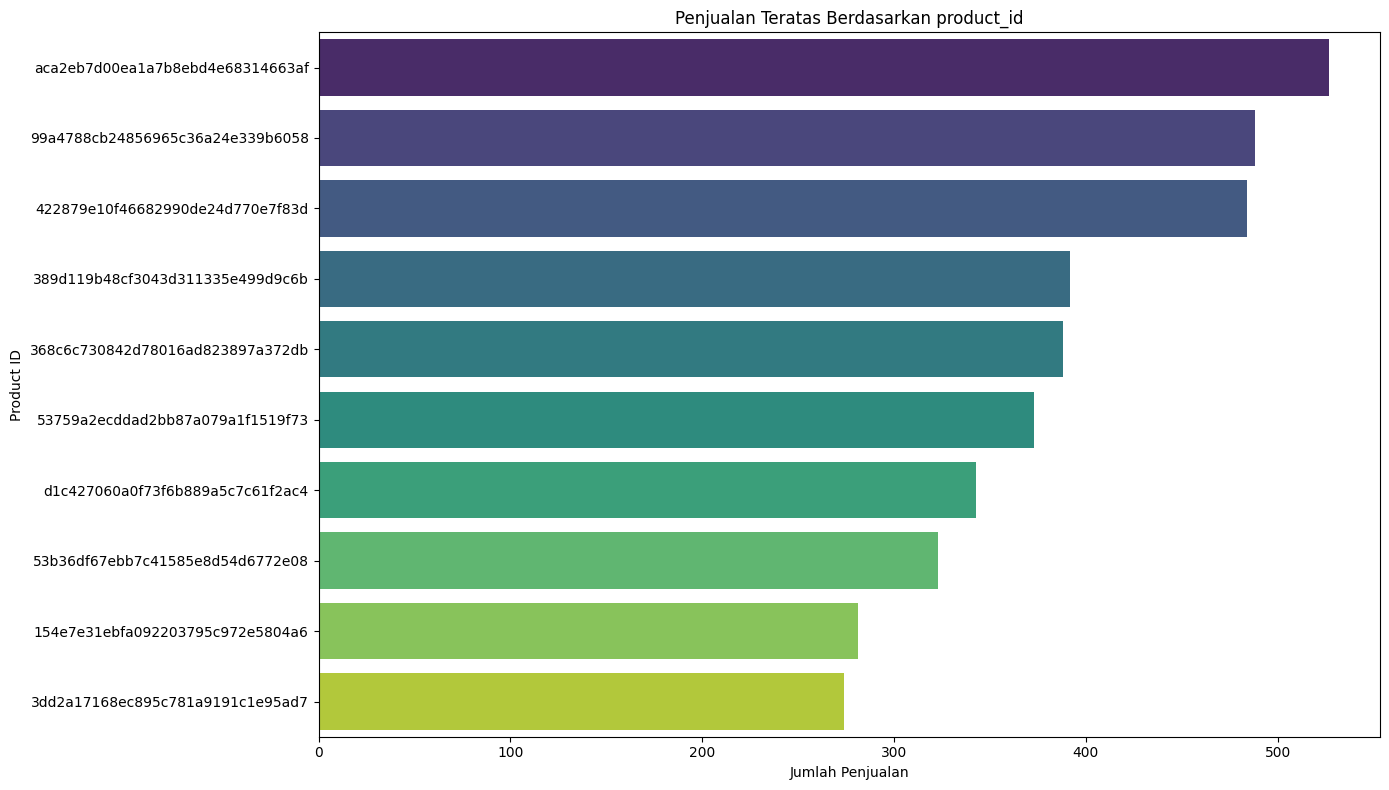

In [77]:
plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales', y='product_id', data=top_categories, palette='viridis')
plt.title("Penjualan Teratas Berdasarkan product_id")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

Dengan chart diatas dapat disimpulkan bahwa Product ID aca2eb7d00ea1a7b8ebd4e68314663af menduduki penjualan teratas sebanyak 527 penjualan.

### Pertanyaan 2: Bagaimana tren pengembalian produk dalam dataset ini?

In [1]:
returns = pd.merge(returned_count, total_sales, on='product_id', how='left')
returns['return_percentage'] = (returns['returned_count'] / returns['total_sales']) * 100

NameError: name 'pd' is not defined

In [109]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
returns['return_range'] = pd.cut(returns['return_percentage'], bins=bins, labels=labels, right=False)

In [110]:
return_counts = returns['return_range'].value_counts().reset_index()
return_counts.columns = ['return_range', 'product_count']
print(return_counts)

  return_range  product_count
0        0-10%             65
1       50-60%             56
2       10-20%             29
3       20-30%             29
4       30-40%             29
5       40-50%              5
6       60-70%              5
7       80-90%              2
8       70-80%              0
9      90-100%              0


<ipython-input-111-34980569f72b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='return_range', y='product_count', data=return_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Wh

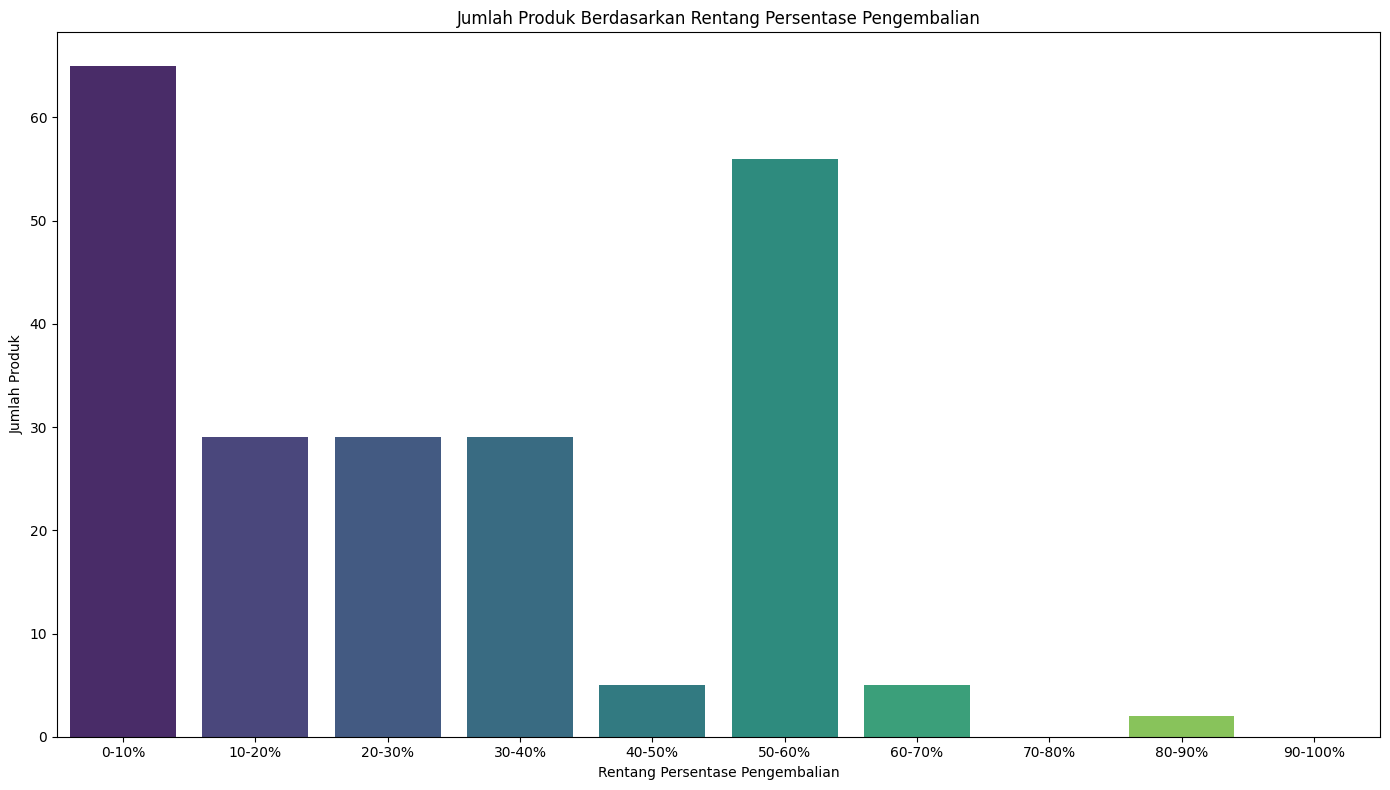

In [111]:
plt.figure(figsize=(14, 8))
sns.barplot(x='return_range', y='product_count', data=return_counts, palette='viridis')
plt.title("Jumlah Produk Berdasarkan Rentang Persentase Pengembalian")
plt.xlabel("Rentang Persentase Pengembalian")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

Dari chart diatas dapat dilihat bahwa persentase pengembalian dengan nilai 0-10% masih menduduki posisi tertinggi untuk tiap produk dalam dataset.

### Pertanyaan 3: Bagaimana distribusi order status untuk setiap states pelanggan ?

In [61]:
order_status_distribution = orders_customers.groupby(['customer_state', 'order_status']).size().unstack().fillna(0)
print("Distribusi Status Pesanan untuk Setiap Negara Bagian:")
print(order_status_distribution)

Distribusi Status Pesanan untuk Setiap Negara Bagian:
order_status    approved  canceled  created  delivered  invoiced  processing  \
customer_state                                                                 
AC                   0.0       0.0      0.0       80.0       0.0         0.0   
AL                   0.0       1.0      0.0      397.0       2.0         3.0   
AM                   0.0       0.0      0.0      145.0       0.0         0.0   
AP                   0.0       0.0      0.0       67.0       0.0         1.0   
BA                   0.0      16.0      0.0     3256.0       9.0        11.0   
CE                   0.0       7.0      0.0     1279.0       1.0         5.0   
DF                   0.0       7.0      1.0     2080.0       3.0         7.0   
ES                   0.0       9.0      0.0     1995.0       4.0         2.0   
GO                   0.0      13.0      0.0     1957.0       5.0         5.0   
MA                   0.0       4.0      0.0      717.0       2.0  

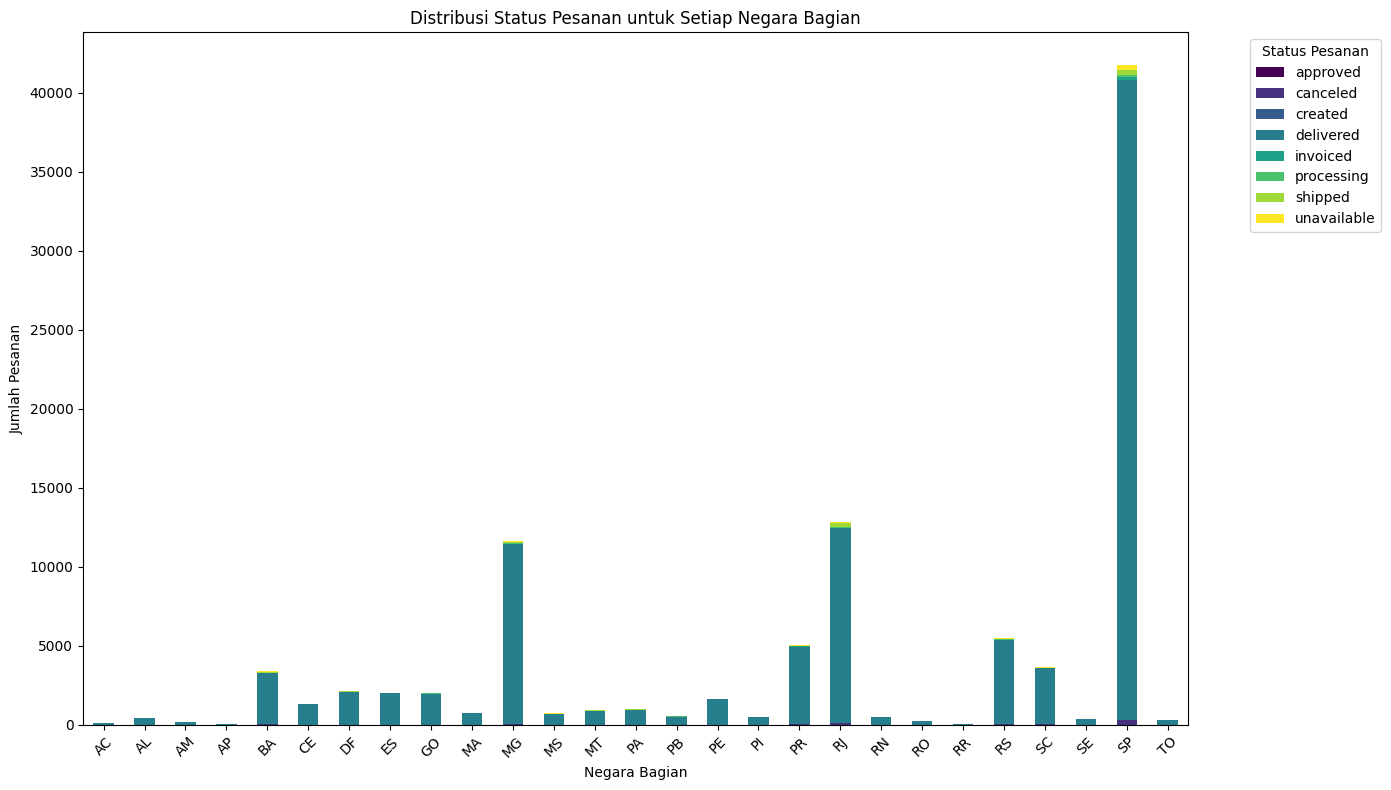

In [59]:
plt.figure(figsize=(14, 8))
order_status_distribution.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Distribusi Status Pesanan untuk Setiap Negara Bagian")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.legend(title="Status Pesanan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

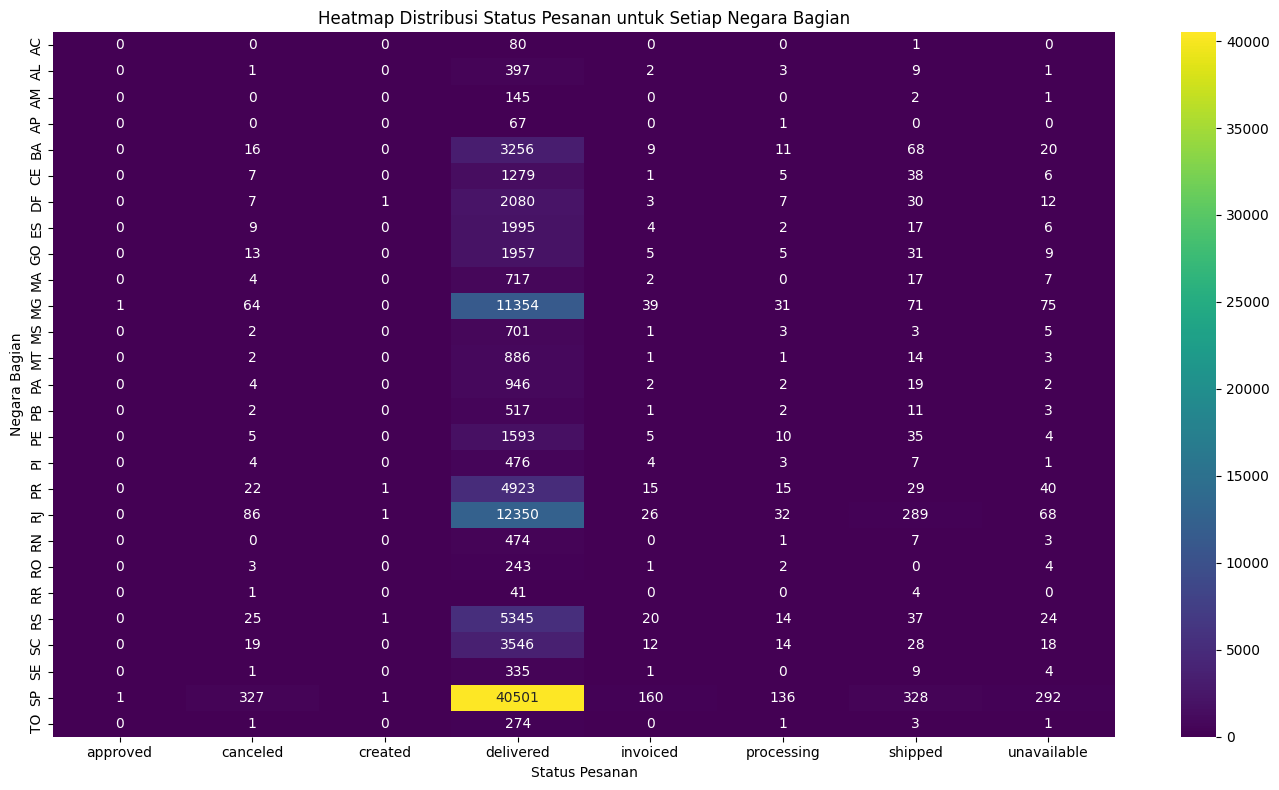

In [60]:
plt.figure(figsize=(14, 8))
sns.heatmap(order_status_distribution, annot=True, fmt=".0f", cmap='viridis')
plt.title("Heatmap Distribusi Status Pesanan untuk Setiap Negara Bagian")
plt.xlabel("Status Pesanan")
plt.ylabel("Negara Bagian")
plt.tight_layout()
plt.show()

Dari kedua visualisasi diatas dapat dilihat distribusi dari order status untuk tiap pesanan dari negara bagian(states) pelanggan dalam dataset.

Insight : 
- Visualisasi penjualan produk berdasarkan product_id memberikan gambaran jelas tentang produk terlaris. 
- Analisis tren pengembalian produk menunjukkan bahwa sebagian besar produk memiliki persentase pengembalian yang rendah (0-10%). Hal ini menandakan bahwa sebagian besar pelanggan puas dengan produk yang diterima.
- Distribusi status pesanan untuk setiap negara bagian memberikan wawasan tentang efisiensi pengiriman berdasarkan lokasi. Dengan ini dapat dilakukan pengoptimalan untuk area yang memiliki tingkat keterlambatan pengiriman yang tinggi.
- Heatmap yang menunjukkan distribusi status pesanan di berbagai negara bagian dapat membantu dalam mengidentifikasi pola dan tren yang mungkin tidak terlihat dari analisis numerik.

## Conclusion

1. Produk dengan ID aca2eb7d00ea1a7b8ebd4e68314663af mencatatkan penjualan tertinggi, yaitu sebanyak 527 penjualan. Hasil ini menunjukkan bahwa produk tersebut mungkin memiliki daya tarik yang kuat di kalangan pelanggan. Dengan adanya analisis ini dapat memberikan insight untuk merumuskan strategi pemasaran produk-produk lainnya selanjutnya. 
2. Tren pengembalian produk dalam dataset ini cenderung rendah, dengan persentase pengembalian 0-10% sebagai yang tertinggi. Hal ini menunjukkan bahwa pelanggan umumnya puas dengan produk yang mereka beli. Namun tetap terdapat beberapa produk dengan tingkat pengembalian tinggi yang perlu diperhatikan lebih dalam. 
3. Distribusi status pesanan menunjukkan dominasi status "delivered" atau "terkirim", yang mencerminkan efektivitas sistem pengiriman yang ada. Hal ini menunjukkan efektifitas sistem logistik dan manajemen stok produk. Namun terdapat pula beberapa pesanan dengan status canceled yang perlu diperhatikan lebih dalam. 